In [1]:
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

%matplotlib inline

# Decision Tree on Yes or No Breast Cancer Dataset

For the sake of further analysis, a dataset reflecting whether or not the values for mean_radius, texture, perimeter, area, and smoothness were greater than the respective averages for each of those variables. A Decision Tree was created using this dataset in order to predict whether or not a patient's tumor may be Malignant (1) or Benign (0) based on these variables. This was done in Excel via IF statements which assigned a 1 if the value in a cell was above an average value and 0 if the value in a cell was below an average value. For example, the average mean_radius is 14.127, so values in that column which are assigned a 1 are those that are above this number and values that are assigned a 0 are those that sit below it. This is the same for the respective averages in all other columns, apart from the diagnosis column.

This is because in the "diagnosis" column, 1 signifies a Malignant diagnosis and 0 signifies a Benign diagnosis.

# Loading the CSV

In [2]:
df = pd.read_csv(r'C:\projects\Decision_Tree.csv')

df

,mean_radius>avg,mean_texture>avg,mean_perimeter>avg,mean_area>avg,mean_smoothness>avg,diagnosis
0,1,0,1,1,1,0
1,1,0,1,1,0,0
2,1,1,1,1,1,0
3,0,1,0,0,1,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
564,1,1,1,1,1,0
565,1,1,1,1,1,0
566,1,1,1,1,0,0
567,1,1,1,1,1,0


In [3]:
df.columns

Index(['mean_radius>avg', 'mean_texture>avg', 'mean_perimeter>avg',
       'mean_area>avg', 'mean_smoothness>avg', 'diagnosis'],
      dtype='object')

In [4]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

# Training the Decision Tree

In [5]:
y_target = df['diagnosis']

In [6]:
df.columns.values

array(['mean_radius>avg', 'mean_texture>avg', 'mean_perimeter>avg',
       'mean_area>avg', 'mean_smoothness>avg', 'diagnosis'], dtype=object)

In [7]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

In [8]:
features = ['mean_radius>avg', 'mean_texture>avg', 'mean_perimeter>avg', 'mean_area>avg', 'mean_smoothness>avg']

In [9]:
feature_names = ['mean_radius>avg', 'mean_texture>avg', 'mean_perimeter>avg', 'mean_area>avg', 'mean_smoothness>avg']

In [10]:
X_feature = df[features]
X_feature

,mean_radius>avg,mean_texture>avg,mean_perimeter>avg,mean_area>avg,mean_smoothness>avg
0,1,0,1,1,1
1,1,0,1,1,0
2,1,1,1,1,1
3,0,1,0,0,1
4,1,0,1,1,1
...,...,...,...,...,...
564,1,1,1,1,1
565,1,1,1,1,1
566,1,1,1,1,0
567,1,1,1,1,1


In [11]:
# Holding 20% of data for testing, test_size = 0.2
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.2, random_state = 42)

In [12]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [13]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 90.35087719298247 %


The overall accuracy of this Decision Tree stands at about 90.4%

# Plotting the Decision Tree as a Figure

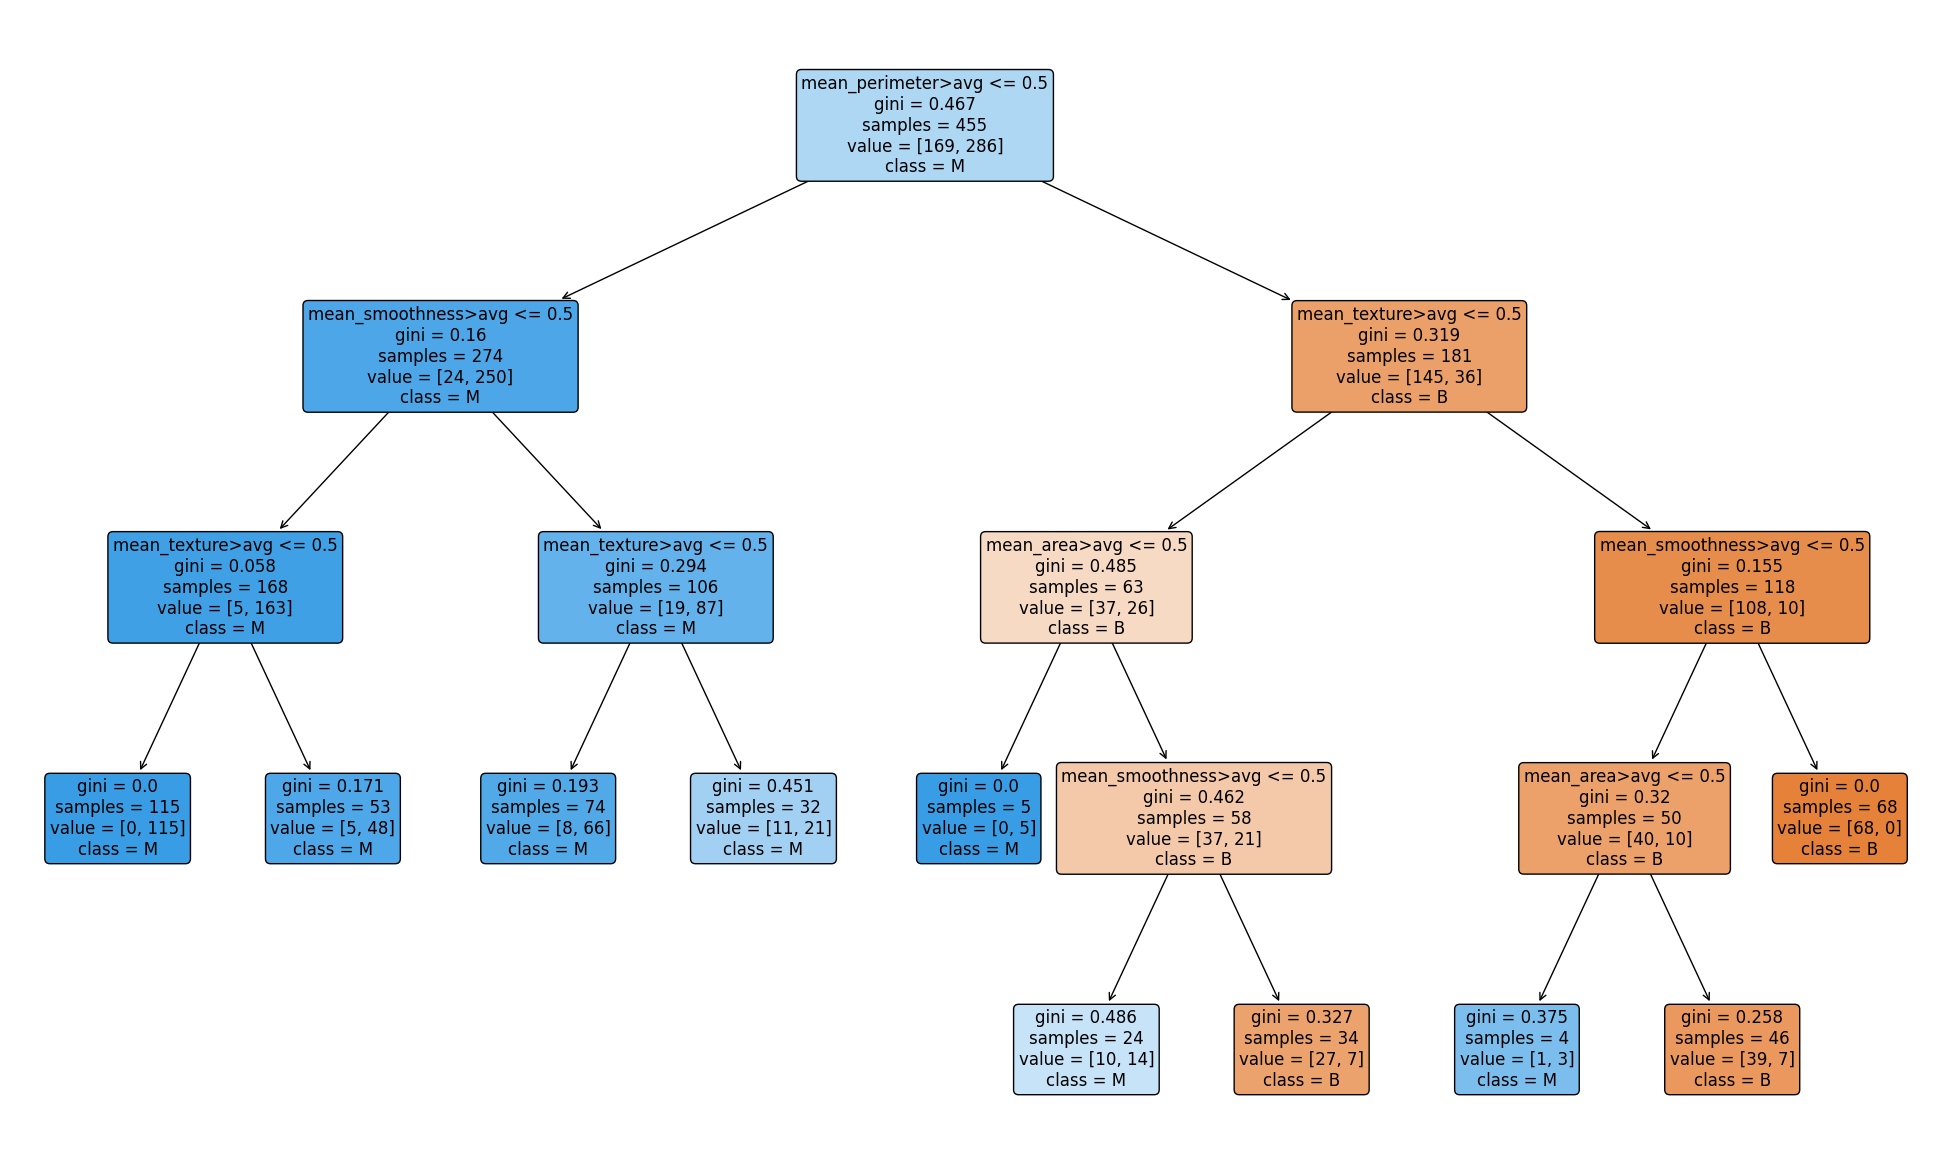

In [14]:
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(clf,
               feature_names=feature_names,
               class_names=['B','M'], # B is Benign, M is Malignant
               filled=True,
               rounded=True,
               fontsize=12,
               ax=ax)
plt.savefig(r'C:\projects\decision_tree.png')
plt.show()

Using the data it was trained on, the Decision Tree is able to predict whether or not a patient is more likely to possess a Benign or Malignant tumor based on the characteristics of the one that they possess. Decision Trees help to display important information such as the gini which measures the impurity of a node, samples which show the amount of data points that exist per node, value which displays the split in which the data points represented by the samples take, and class which communicates the most likely classification that a diagnosis would be if a prediction had to be made.

For example, in the first node where mean_perimeter>avg <= 0.5, where this variable is less than or equal to 0.5 (in tihs case, when it equals 0), gini = 0.467, there are 455 samples, the split of those samples is 169 Benign and 286 Malignant, thus making the tree's predicted classification Malignant if it had to stop there. As one goes further down the tree, details pile up, leading to more specific predictions being made based on accumulating conditions.